In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('stars.csv')
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [5]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 15.0+ KB


In [11]:
df['Spectral_Class'].value_counts()
df['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
spec_class=le.fit_transform(df['Spectral_Class'])
spec_class

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 6, 1, 1, 1, 2, 0, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 4, 4, 4, 0, 0, 4, 2, 0, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 1, 5, 5,
       6, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 6, 6, 0, 1, 1, 2,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 1, 6, 6, 0, 0, 6])

In [21]:
colour=le.fit_transform(df['Color'])
df.drop(['Spectral_Class','Color'],axis=1,inplace=True)

KeyError: 'Color'

In [22]:
df['Spectral_class']=spec_class
df['Colour']=colour
df

,Temperature,L,R,A_M,Type,Spectral_class,Colour
0,3068,0.002400,0.1700,16.12,0,5,8
1,3042,0.000500,0.1542,16.60,0,5,8
2,2600,0.000300,0.1020,18.70,0,5,8
3,2800,0.000200,0.1600,16.65,0,5,8
4,1939,0.000138,0.1030,20.06,0,5,8
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,6,0
236,30839,834042.000000,1194.0000,-10.63,5,6,0
237,8829,537493.000000,1423.0000,-10.73,5,0,9
238,9235,404940.000000,1112.0000,-11.23,5,0,9


<Figure size 2800x1400 with 0 Axes>

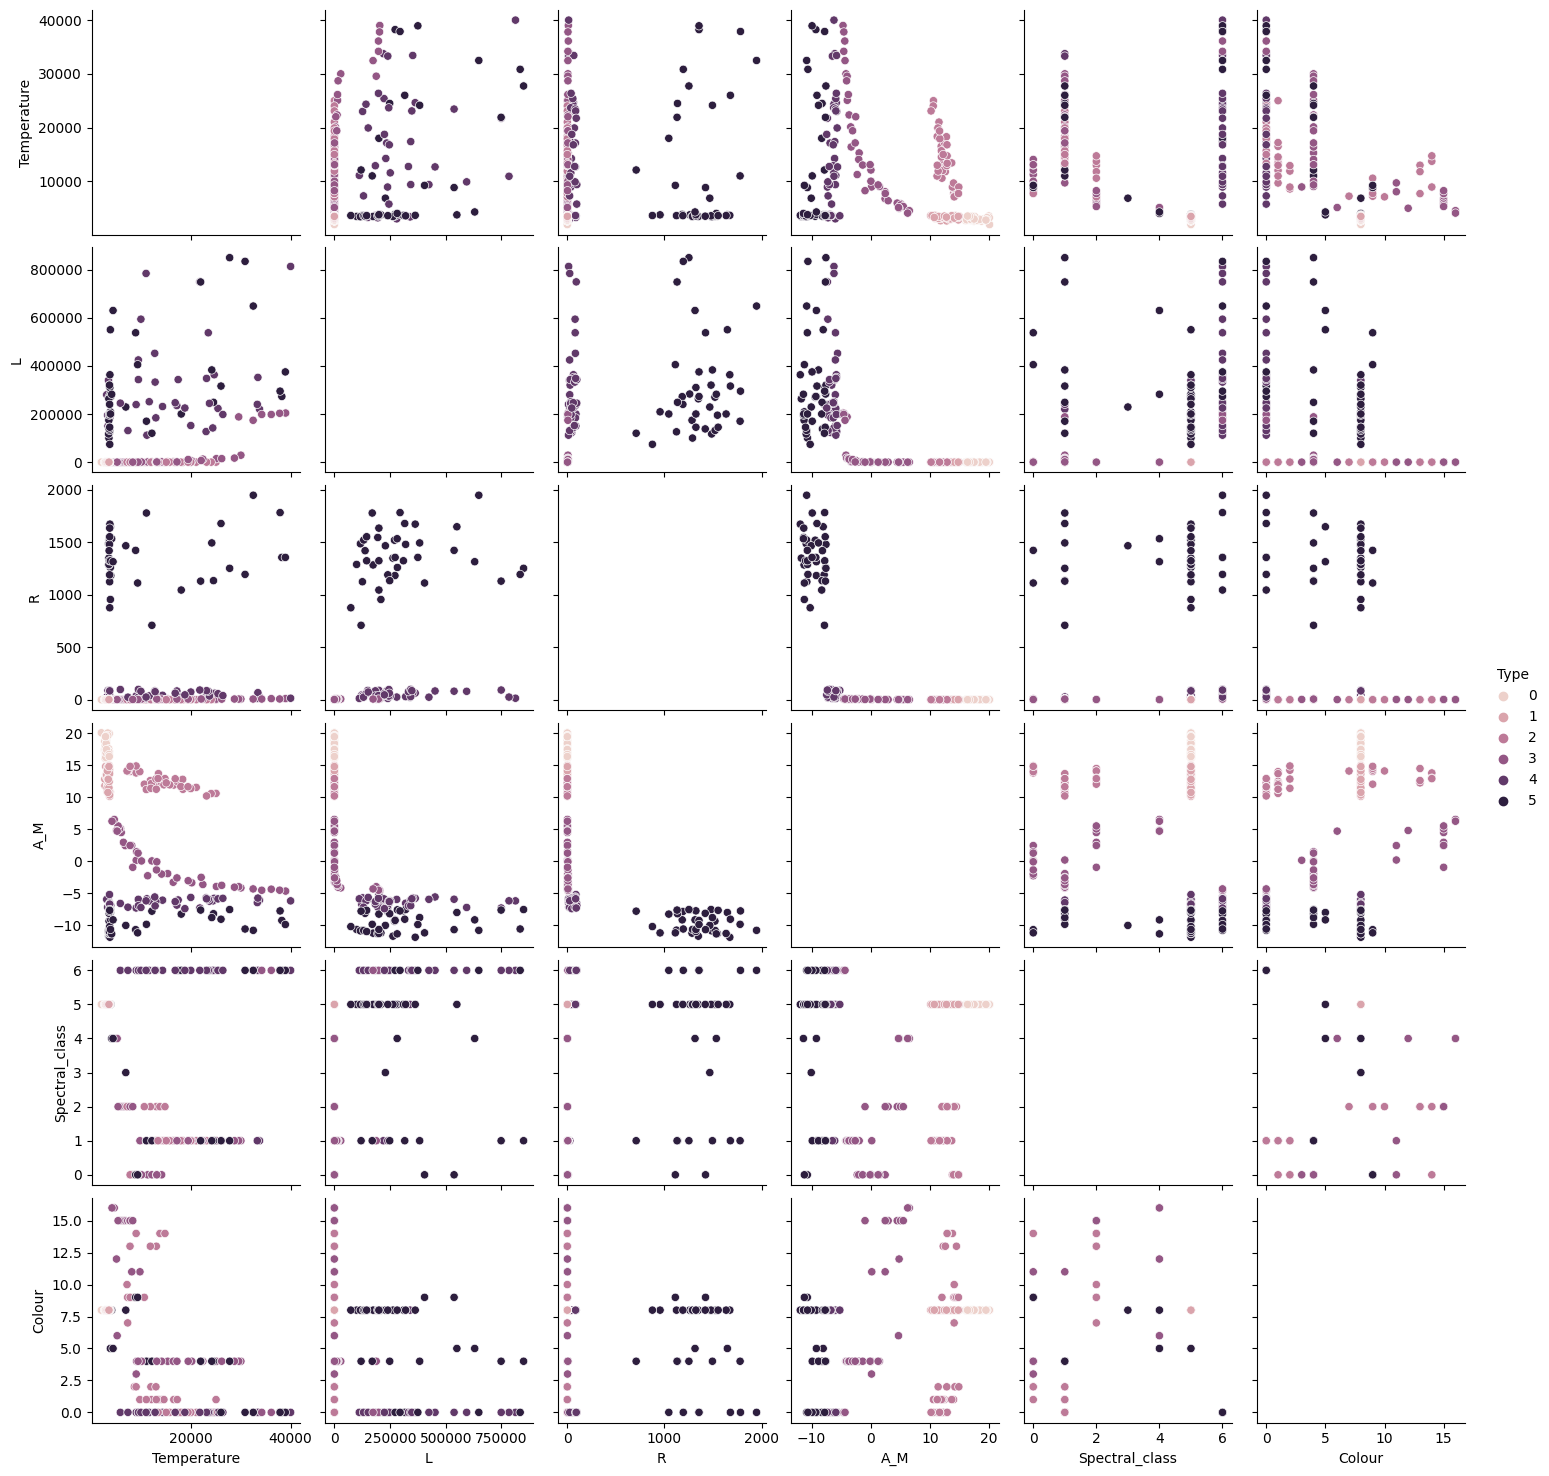

In [24]:
plt.figure(figsize=(28,14))
sns.pairplot(df,hue='Type',diag_kind='kdfe',kind='scatter')

<Axes: >

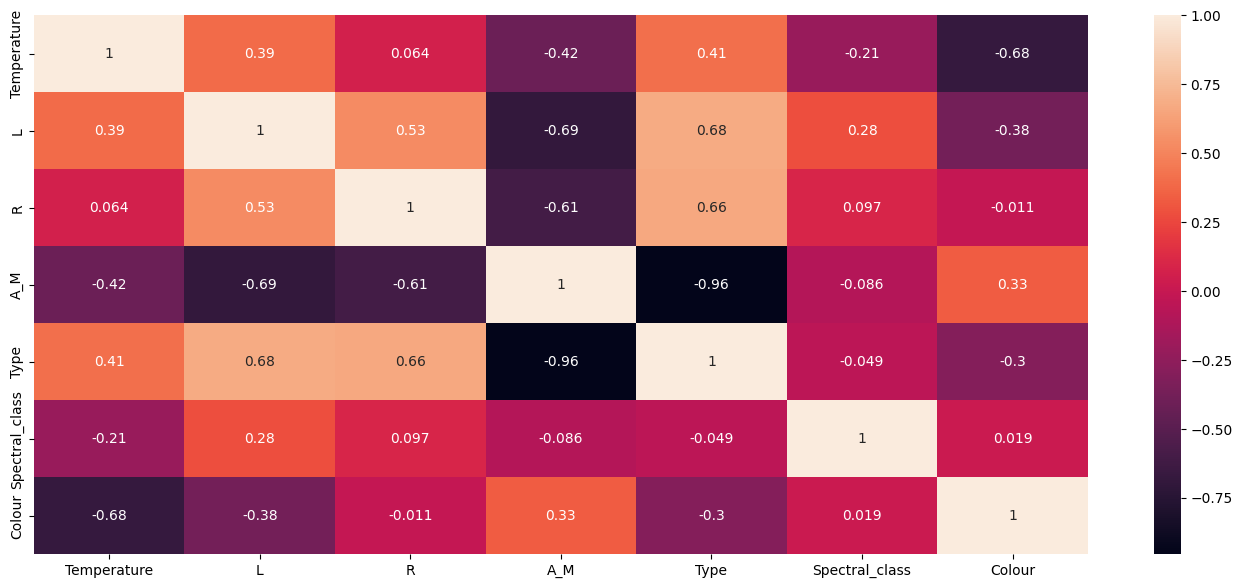

In [26]:
df1=df.corr()
plt.figure(figsize=(17,7))
sns.heatmap(df1,annot=True)

In [40]:
x=df[['L','R','A_M']]
y=df['Type']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8,random_state=1)

In [30]:
from sklearn.svm import SVC

In [31]:
from adspy_shared_utilities import plot_class_regions_for_classifier

ModuleNotFoundError: No module named 'adspy_shared_utilities'

In [36]:
svc=SVC()

In [37]:
svc.fit(x_train,y_train)

SVC()

In [42]:
svc.score(x_train,y_train)

0.359375

In [41]:
svc.score(x_test,y_test)

0.22916666666666666

In [44]:
from sklearn.model_selection import cross_val_score
scrore=cross_val_score(svc,x,y)
scrore

array([0.41666667, 0.41666667, 0.5625    , 0.5       , 0.375     ])

In [45]:
scrore.mean()

0.4541666666666667

In [49]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(x,y)
clf.cv_results_

{'mean_fit_time': array([7.11016655e-03, 2.97410793e+00, 4.39872742e-03, 4.22577720e+00,
        4.20336723e-03, 3.40103388e+00]),
 'std_fit_time': array([2.49743721e-03, 8.00409497e-01, 3.73624617e-04, 2.14855064e+00,
        2.47689958e-04, 1.10647618e+00]),
 'mean_score_time': array([0.00376492, 0.00120339, 0.00193129, 0.00139298, 0.00226197,
        0.00131879]),
 'std_score_time': array([0.00236526, 0.00039973, 0.00035267, 0.00047955, 0.0003325 ,
        0.0003892 ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [51]:
x=pd.DataFrame(clf.cv_results_)
x

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007110,0.002497,0.003765,0.002365,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.729167,0.791667,0.645833,0.604167,0.541667,0.662500,0.088780,6
1,2.974108,0.800409,0.001203,0.000400,1,linear,"{'C': 1, 'kernel': 'linear'}",0.937500,0.937500,0.916667,0.958333,0.937500,0.937500,0.013176,3
2,0.004399,0.000374,0.001931,0.000353,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.708333,0.791667,0.687500,0.645833,0.666667,0.700000,0.050346,5
3,4.225777,2.148551,0.001393,0.000480,10,linear,"{'C': 10, 'kernel': 'linear'}",0.979167,0.979167,0.937500,0.979167,0.937500,0.962500,0.020412,1
4,0.004203,0.000248,0.002262,0.000333,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.729167,0.791667,0.687500,0.666667,0.666667,0.708333,0.047507,4
5,3.401034,1.106476,0.001319,0.000389,20,linear,"{'C': 20, 'kernel': 'linear'}",0.979167,0.979167,0.937500,0.979167,0.937500,0.962500,0.020412,1


In [52]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [54]:
clf.best_score_

0.9625